In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score


df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv', sep=';')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

In [3]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s',
origin='1970-01-01')
print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.395999908   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999958   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999931   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000040                     1467681                 22  
1 2018-12-25 11:02:41.269999981                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000013                      722632                 27  
4 2018-11-22 12:53:41.529999970                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries,

In [4]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000013
Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.395999908   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999958   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999931   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False

In [5]:
# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']

# Cetak lima data teratas
print(df.head())

   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.395999908   
1        29531  Sepatu 2014-07-23 01:02:11.493999958   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999931   
4        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  


In [6]:
print('\nInfo dataset:')
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
 6   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 5.3+ MB
None


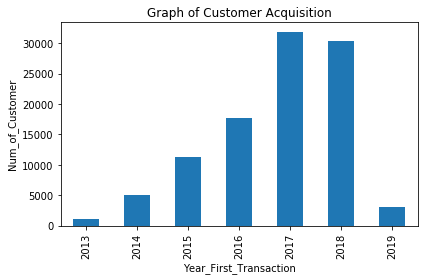

In [7]:
# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

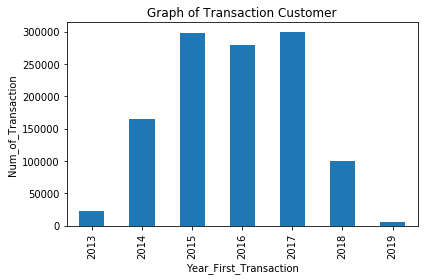

In [8]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

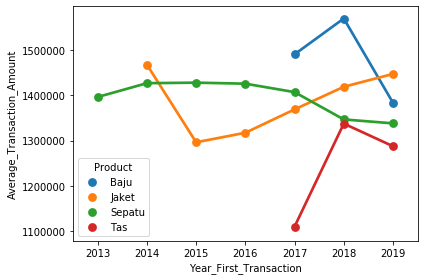

In [9]:
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
x='Year_First_Transaction',
y='Average_Transaction_Amount',
hue='Product')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

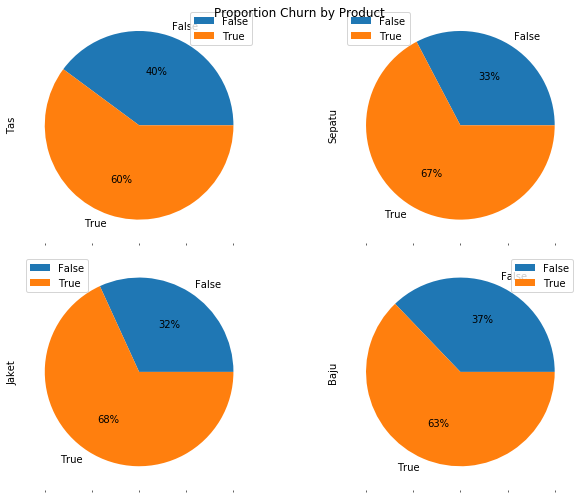

In [10]:
plt.clf()
# Melakukan pivot data
df_piv = df.pivot_table(index='is_churn',
columns='Product',
values='Customer_ID',
aggfunc='count',
fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
figsize=(10, 7),
layout=(-1, 2),
autopct='%1.0f%%',
title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

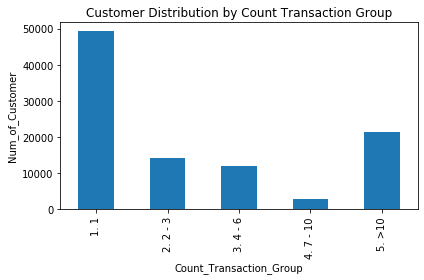

In [11]:
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
        val ='2. 2 - 3'
    elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
        val ='3. 4 - 6'
    elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
        val ='4. 7 - 10'
    else:
        val ='5. >10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

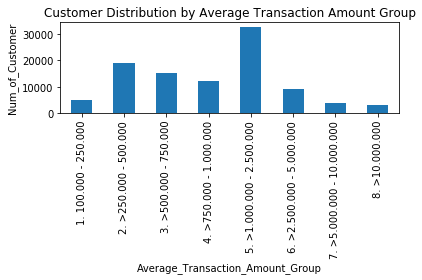

In [12]:

plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
	if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
		val ='1. 100.000 - 250.000'
	elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
		val ='2. >250.000 - 500.000'
	elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
		val ='3. >500.000 - 750.000'
	elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
		val ='4. >750.000 - 1.000.000'
	elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
		val ='5. >1.000.000 - 2.500.000'
	elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
		val ='6. >2.500.000 - 5.000.000'
	elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
		val ='7. >5.000.000 - 10.000.000'
	else:
		val ='8. >10.000.000'
	return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

In [43]:

# Feature column: Year_Diff
df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns]

# Target variable
y = df['is_churn']
y=y.astype('int')

In [60]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=100)

In [69]:

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Predict model
y_pred=logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
scores = accuracy_score(y_test,y_pred)
print(scores)

0.6656333333333333


In [65]:
k_range = list(range(1,50))
scores = []
for k in k_range:
    model_knn = tree.DecisionTreeClassifier(max_depth=k)
    model_knn.fit(X_train,y_train)
    y_pred = model_knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    
print(scores)

[0.7702666666666667, 0.7702666666666667, 0.7702666666666667, 0.7709166666666667, 0.7705666666666666, 0.7699166666666667, 0.7680166666666667, 0.7683666666666666, 0.7659166666666667, 0.7653333333333333, 0.7612333333333333, 0.76015, 0.7575333333333333, 0.7554833333333333, 0.7526333333333334, 0.7493666666666666, 0.7466333333333334, 0.7436166666666667, 0.7408666666666667, 0.7387666666666667, 0.7365666666666667, 0.7353333333333333, 0.7319833333333333, 0.7306166666666667, 0.7290333333333333, 0.7269333333333333, 0.7244666666666667, 0.72365, 0.7189333333333333, 0.7175833333333334, 0.7161333333333333, 0.7140333333333333, 0.7126166666666667, 0.7107666666666667, 0.7081833333333334, 0.7067333333333333, 0.7031666666666667, 0.7010833333333333, 0.6990166666666666, 0.69565, 0.6931166666666667, 0.69175, 0.689, 0.6875333333333333, 0.685, 0.6825833333333333, 0.68185, 0.6785833333333333, 0.6783333333333333]


In [66]:
k_range = list(range(1,50))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train,y_train)
    y_pred = model_knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    
print(scores)

[0.5793833333333334, 0.5082833333333333, 0.5952, 0.5491166666666667, 0.6059333333333333, 0.5758833333333333, 0.6156666666666667, 0.5900833333333333, 0.6231166666666667, 0.6042666666666666, 0.6293333333333333, 0.6127833333333333, 0.6345333333333333, 0.61965, 0.6392, 0.62755, 0.6413666666666666, 0.6319666666666667, 0.6449833333333334, 0.6376833333333334, 0.64785, 0.6411833333333333, 0.65085, 0.6446666666666667, 0.65215, 0.6469666666666667, 0.6522166666666667, 0.6491333333333333, 0.6549666666666667, 0.6516166666666666, 0.657, 0.6540666666666667, 0.65815, 0.6544833333333333, 0.6585666666666666, 0.65545, 0.6595, 0.6572166666666667, 0.6602666666666667, 0.6575, 0.6601833333333333, 0.6579166666666667, 0.6610666666666667, 0.65865, 0.6611333333333334, 0.65945, 0.6613333333333333, 0.6599333333333334, 0.6618]


In [73]:
#Prediction terbaik DecisionTreeClassifier dengan max_depth = 4

model_knn = tree.DecisionTreeClassifier(max_depth=4)
model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)
scores = accuracy_score(y_test,y_pred)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)
print(scores)

Confusion Matrix:
 [[ 9053 11003]
 [ 2742 37202]]
0.7709166666666667


<Figure size 432x288 with 0 Axes>

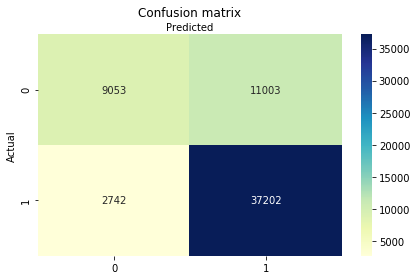

In [74]:
# import required modules

plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [75]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.7709166666666667
Precision: 0.7709166666666667
Recall : 0.7709166666666667
